# D212: Data Mining, Task 3
Western Governors University
<br>Bailey Psuik 
<br>February 2024

### Part I: Research Question
**A1. Proposal of question**
<br>The telecommunications industry is a competitive one in which customers have multiple providers available to choose from. This report analyzes data from a popular telecommunications company that is interested in improving their churn rate. Churn is defined as the percentage of customers who have discontinued service with the provider. Industry-wide, annual churn rates can be as high as 25%. The company knows that it is more cost-effective to retain existing customers than to acquire new ones, and therefore seeks to identify trends in customer data and uncover key metrics to help them predict their anticipated churn rate, in hopes of mitigating it. One way of mitigating churn is to provide customers the ability to purchase items of interest. 

The telecommunications company being analyzed in this report has collected data on tech products it sells. Their intention is to gain a better understanding their customers' purchasing habits by discovering which items are most popular and what items are frequently purchased together. To accomplish this, this report will make use of market basket analysis to answer the following question: **What are the three most popular item pairings among customers?**

**A2. Defined goal**
<br>The company's aim is to provide customers with discounts on items of interest. It is common for a customer to purchase more than one item in a single transaction. The benefits of uncovering which items are frequently purchased together is beneficial to both the company and its customers. The primary benefits of gaining an understanding of customer purchasing habits are: 
* Increased sales through improved product placement: Convenience for customers is key, and if products that are frequently purchased together are close to one another whether on the website's storefront, then customers are more likely to purchase the additional item based on trends in customer habits.
* Increased customer satisfaction: The more products available for purchase by the customer, the higher their likelihood of satisfaction since they are able to find what they are looking for. Not only this, but satisfaction would also be increased by offering discounts on popular products or pairings of products.

With this in mind, the goal of the analysis is to **find the most popular item pairings for the purpose of improving product placement and overall sales**. 

### Part II: Market Basket Justification
**B1. Explanation of market basket analysis**
<br>Market basket analysis is a data mining method that is used to determine the strength of a relationship between groupings of products or services that are frequently purchased together in 'baskets'. 

The expected outcomes of market basket analysis are rules-- pairs or groups of products determined to be frequently purchased together based on metrics such as support*, confidence* and lift*. These outcomes help a company to gain an understanding of their customers' purchasing habits and allow the company to offer discounts on popular product groupings, and improve their product placement whether in their brick-and-mortar store or on their online storefront.

Rules are formatted as "if-then" statements that take the form of {antecedent}-->{consequent}. The rule can be read as "If {antecedent}, then {consequent}". Take, for example, an online sporting goods store. A market basket analysis of customers' purchasing habits may output a rule of "If {running shoes}, then {GU energy gel}", which would indicate that customers who purchase a new pair of running shoes frequently purchase GU energy gel in the same transaction. The sporting goods store could then benefit from an improvement to the layout of its website where energy gels are placed in close proximity to running shoes, or including the energy gels in a "You may also like..." section, as many popular websites do, if a customer has running shoes in their cart. 

*An explanation of these metrics is provided in section D1.

**B2. Transaction example**
<br>An example of a transaction included in this data set is the purchase of a 10ft iPHone Charger Cable 2 Pack and a Dust-Off Compressed Gas 2 pack.

This is demonstrated by the rule in the first row of the rules_table formulated in section C3 that states: If {10ft iPHone Charger Cable 2 Pack} --> then {Dust-Off Compressed Gas 2 pack}. 

**B3. Market basket assumption**
<br>Market basket analysis requires a large data set-- one large enough to uncover patterns in the data. The larger the sample, the more informative the data will be. If the data set is too small, it could be the case that patterns picked up on in a market basket analysis are by happenstance and not actually representative of overall customer habits. Therefore, it is assumed in market basket analysis that the data set is large enough to uncover meaningful patterns and relationships.

### Part III: Data Preparation and Analysis

**C1. Transforming the data set**

In [112]:
# All code executed in Part III is adapted from Dr. Kamara's D212 Panopto webinar (Kamara, n.d.)

# Import all necessary packages
import pandas as pd
from pandas import DataFrame
import numpy as np

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
# Import the csv containing customer purchase data
data = pd.read_csv("C:/Users/psuik/Desktop/WGU/D212/teleco_market_basket.csv")

# Explore the original data
data.head(5)

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Item01  7501 non-null   object
 1   Item02  5747 non-null   object
 2   Item03  4389 non-null   object
 3   Item04  3345 non-null   object
 4   Item05  2529 non-null   object
 5   Item06  1864 non-null   object
 6   Item07  1369 non-null   object
 7   Item08  981 non-null    object
 8   Item09  654 non-null    object
 9   Item10  395 non-null    object
 10  Item11  256 non-null    object
 11  Item12  154 non-null    object
 12  Item13  87 non-null     object
 13  Item14  47 non-null     object
 14  Item15  25 non-null     object
 15  Item16  8 non-null      object
 16  Item17  4 non-null      object
 17  Item18  4 non-null      object
 18  Item19  3 non-null      object
 19  Item20  1 non-null      object
dtypes: object(20)
memory usage: 2.3+ MB


In [115]:
data.shape

(15002, 20)

In [116]:
# Drop blank rows from the dataset
## Retain only rows with non-null values
data = data[data['Item01'].notna()]

data.shape

(7501, 20)

In [117]:
# data went from 15,002 to 7,501 rows, meaning that half of the rows in the original data set were blank

# Convert data to a list of lists
## Empty list:
rows = []
## for loop ranging from 0 to 7501, corresponding with number of rows in the data set
for i in range (0,7501):
    rows.append([str(data.values[i,j])
for j in range (0,20)])

In [118]:
# Feed the list (rows) into TransactionEncoder
## TransactionEncoder is used to preprocess data by creating a numpy boolean array, where values of 'False' = no missing values present, and values of 'True' = missing values present

# Instantiate the encoder
encoder = TransactionEncoder()
# Create array of fit and transformed data
array = encoder.fit(rows).transform(rows)
# Transform array into dataframe
## This dataframe will contain each item as its own column, and contain rows of boolean values as noted above
transaction = pd.DataFrame(array, columns=encoder.columns_)
transaction

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,...,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nan,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7497,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [119]:
# 120 columns ==> 120 items included in the data set
# 7501 rows ==> 7501 transactions included in the dataset

# Display a list of all items by displaying a list of all columns
for col in transaction.columns:
    print(col)

10ft iPHone Charger Cable
10ft iPHone Charger Cable 2 Pack
3 pack Nylon Braided Lightning Cable
3A USB Type C Cable 3 pack 6FT
5pack Nylon Braided USB C cables
ARRIS SURFboard SB8200 Cable Modem
Anker 2-in-1 USB Card Reader
Anker 4-port USB hub
Anker USB C to HDMI Adapter
Apple Lightning to Digital AV Adapter
Apple Lightning to USB cable
Apple Magic Mouse 2
Apple Pencil
Apple Pencil 2nd Gen
Apple Power Adapter Extension Cable
Apple USB-C Charger cable
AutoFocus 1080p Webcam
BENGOO G90000 headset
Blue Light Blocking Glasses
Blue Light Blocking Glasses 2pack
Brother Genuine High Yield Toner Cartridge
Cat 6 Ethernet Cable 50ft
Cat8 Ethernet Cable
CicTsing MM057 2.4G Wireless Mouse
Cleaning Gel Universal Dust Cleaner
Creative Pebble 2.0 Speakers
DisplayPort ot HDMI adapter
Dust-Off Compressed Gas
Dust-Off Compressed Gas 2 pack
FEEL2NICE 5 pack 10ft Lighning cable
FEIYOLD Blue light Blocking Glasses
Falcon Dust Off Compressed Gas
HOVAMP Mfi 6pack Lightning Cable
HOVAMP iPhone charger
HP 61 

In [120]:
# There is an empty row in transaction (nan) that needs to be dropped

# Remove nan column from transaction & save the resulting table as cleaned_df
## cleaned_df will be used from this point forward to create the rules in an apriori algorithm
cleaned_df = transaction.drop(['nan'], axis=1)
cleaned_df.shape

(7501, 119)

In [121]:
# To update the earlier statement saying the data contains 120 columns, one of those rows was blank, so there are actually 119 items within this data set

In [122]:
# Export cleaned_df as csv
cleaned_df.to_csv("C:/Users/psuik/Desktop/WGU/D212/mba_clean_D212_task3.csv", index=False)

**C2. Code execution**

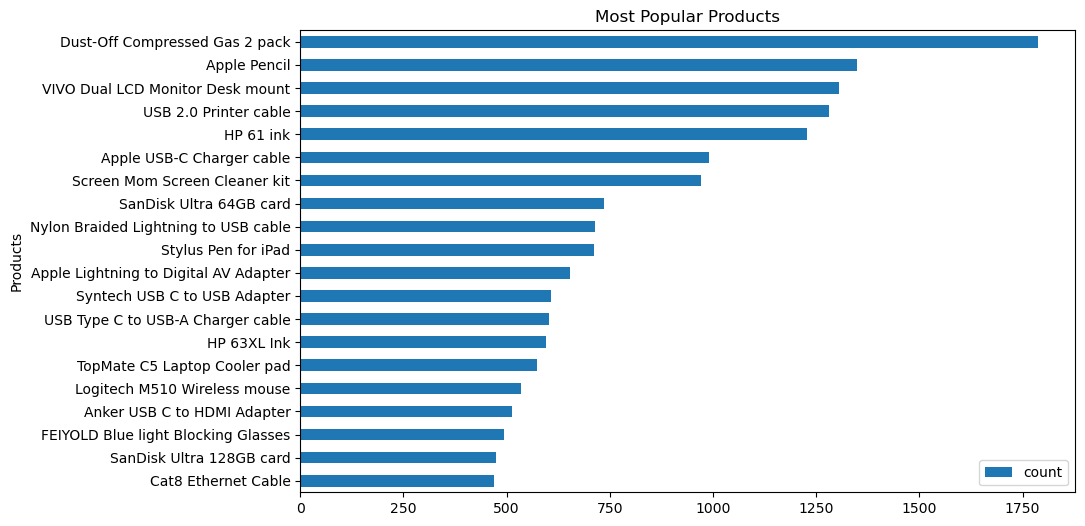

In [152]:
# To get an idea of the popularity of individual items, first find the 10 most popular products in the transformed dataset 
count = cleaned_df.loc[:,:].sum()
pop_item = count.sort_values(ascending=False).head(20)
pop_item = pop_item.to_frame()
pop_item = pop_item.reset_index()
pop_item = pop_item.rename(columns = {'index': 'Products', 0:'count'})

# Visualize the top 10 products in a horizontal bar graph
%matplotlib inline
plt.rcParams['figure.figsize']=(10,6)
ax = pop_item.plot.barh(x='Products', y='count')
plt.title('Most Popular Products')
plt.gca().invert_yaxis()

In [154]:
# Create apriori object, 'rules'
## This object utilizes the cleaned data set and includes only items which have a support value of 0.02 or higher
rules = apriori(cleaned_df, min_support=0.02, use_colnames=True)
rules

,support,itemsets
0,0.050527,(10ft iPHone Charger Cable 2 Pack)
1,0.042528,(3A USB Type C Cable 3 pack 6FT)
2,0.029463,(Anker 2-in-1 USB Card Reader)
3,0.068391,(Anker USB C to HDMI Adapter)
4,0.087188,(Apple Lightning to Digital AV Adapter)
...,...,...
98,0.023730,"(Screen Mom Screen Cleaner kit, USB 2.0 Printe..."
99,0.035462,"(VIVO Dual LCD Monitor Desk mount, Screen Mom ..."
100,0.020131,"(Stylus Pen for iPad, USB 2.0 Printer cable)"
101,0.025197,"(Stylus Pen for iPad, VIVO Dual LCD Monitor De..."


**C3. Association rules table**

In [147]:
# Creating the rules table
## The apriori object 'rules', created above, is now used as an input
## This table is created based on the lift metric for each rule, ordering its output in descending value for lift
## This table uses a minimum threshold of 1, meaning it contains only items whose lift value is 1 or higher
rules_table = association_rules(rules, metric='lift', min_threshold=1)
rules_table.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
1,(Dust-Off Compressed Gas 2 pack),(10ft iPHone Charger Cable 2 Pack),0.238368,0.050527,0.023064,0.096756,1.914955,0.011020,1.051182,0.627330
2,(Anker USB C to HDMI Adapter),(Dust-Off Compressed Gas 2 pack),0.068391,0.238368,0.024397,0.356725,1.496530,0.008095,1.183991,0.356144
3,(Dust-Off Compressed Gas 2 pack),(Anker USB C to HDMI Adapter),0.238368,0.068391,0.024397,0.102349,1.496530,0.008095,1.037830,0.435627
4,(Anker USB C to HDMI Adapter),(VIVO Dual LCD Monitor Desk mount),0.068391,0.174110,0.020931,0.306043,1.757755,0.009023,1.190117,0.462740
5,(VIVO Dual LCD Monitor Desk mount),(Anker USB C to HDMI Adapter),0.174110,0.068391,0.020931,0.120214,1.757755,0.009023,1.058905,0.521973
6,(Apple Lightning to Digital AV Adapter),(Apple Pencil),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,0.499424
7,(Apple Pencil),(Apple Lightning to Digital AV Adapter),0.179709,0.087188,0.028796,0.160237,1.837830,0.013128,1.086988,0.555754
8,(Apple Lightning to Digital AV Adapter),(Dust-Off Compressed Gas 2 pack),0.087188,0.238368,0.024397,0.279817,1.173883,0.003614,1.057552,0.162275
9,(Dust-Off Compressed Gas 2 pack),(Apple Lightning to Digital AV Adapter),0.238368,0.087188,0.024397,0.102349,1.173883,0.003614,1.016889,0.194486


**C4. Top three rules**

In [126]:
# Since lift is used to create the rules table above, it will also be used to determine the top three rules
top_three_rules = rules_table.sort_values('lift', ascending=False).head(3)
top_three_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
84,(VIVO Dual LCD Monitor Desk mount),(SanDisk Ultra 64GB card),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716,0.682343
85,(SanDisk Ultra 64GB card),(VIVO Dual LCD Monitor Desk mount),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
65,(FEIYOLD Blue light Blocking Glasses),(VIVO Dual LCD Monitor Desk mount),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186


### Part IV: Data Summary and Implications

**D1. Significance of support, lift, and confidence summary**

*Support*:
<br>Support indicates the proportion of transactions within the data set that contain a particular item. In other words, it is the frequency with which an item is purchased. This probability can be represented as P(A).
In the case of the top three rules determined by this analysis, 'VIVO Dual LCD Monitor Desk mount' is the most popular singular item included here, with a support value of 0.174 or 17.4%, meaning this is included in 17.4% of transactions. Looking at overall support:

In [127]:
print("Interpreting Support:")
print("The probability that both", list(top_three_rules.loc[84, 'antecedents']), "and", list(top_three_rules.loc[84, 'consequents']), "are purchased in the same transaction is", (top_three_rules.loc[84, 'support'].round(4)))
print("The probability that both", list(top_three_rules.loc[85, 'antecedents']), "and", list(top_three_rules.loc[85, 'consequents']), "are purchased in the same transaction is", (top_three_rules.loc[85, 'support'].round(4)))
print("The probability that both", list(top_three_rules.loc[65, 'antecedents']), "and", list(top_three_rules.loc[65, 'consequents']), "are purchased in the same transaction is", (top_three_rules.loc[65, 'support'].round(4)))

Interpreting Support:
The probability that both ['VIVO Dual LCD Monitor Desk mount'] and ['SanDisk Ultra 64GB card'] are purchased in the same transaction is 0.0392
The probability that both ['SanDisk Ultra 64GB card'] and ['VIVO Dual LCD Monitor Desk mount'] are purchased in the same transaction is 0.0392
The probability that both ['FEIYOLD Blue light Blocking Glasses'] and ['VIVO Dual LCD Monitor Desk mount'] are purchased in the same transaction is 0.0229


*Confidence*:
<br>Confidence measures the probability of item A being purchased if item B is purchased, or P(A and B). The confidence metrics for the top three rules from this analysis are interpreted as follows: 

In [150]:
print("Interpreting Confidence:")
print("If a customer purchases", list(top_three_rules.loc[84, 'antecedents']), "then the probability that they also purchase", list(top_three_rules.loc[84, 'consequents']), "is", (top_three_rules.loc[84, 'confidence'].round(4)))
print("If a customer purchases", list(top_three_rules.loc[85, 'antecedents']), "then the probability that they also purchase", list(top_three_rules.loc[85, 'consequents']), "is", (top_three_rules.loc[85, 'confidence'].round(4)))
print("If a customer purchases", list(top_three_rules.loc[65, 'antecedents']), "then the probability that they also purchase", list(top_three_rules.loc[65, 'consequents']), "is", (top_three_rules.loc[65, 'confidence'].round(4)))

Interpreting Confidence:
If a customer purchases ['VIVO Dual LCD Monitor Desk mount'] then the probability that they also purchase ['SanDisk Ultra 64GB card'] is 0.2251
If a customer purchases ['SanDisk Ultra 64GB card'] then the probability that they also purchase ['VIVO Dual LCD Monitor Desk mount'] is 0.3989
If a customer purchases ['FEIYOLD Blue light Blocking Glasses'] then the probability that they also purchase ['VIVO Dual LCD Monitor Desk mount'] is 0.3482


*Lift*:
<br>Lift is calculated as a ratio of the support of A and B together, to the support of A and B individually. Mathematically this is represented as: P(A and B) / P(A) x P(B). Essentially, lift determines the dependence of item B being purchased if item A is purchased (McColl, n.d.).

In [151]:
print("Interpreting Lift:")
print("Lift(",list(top_three_rules.loc[84, 'antecedents']),"-->",list(top_three_rules.loc[84, 'consequents']),") =",(top_three_rules.loc[84, 'lift'].round(4)))
print("The presence of", list(top_three_rules.loc[84, 'antecedents']), "increases the probability that", list(top_three_rules.loc[84, 'consequents']), 
      "is also purchased in the same transaction by", (top_three_rules.loc[84, 'lift'].round(4)-1)*100,"%")
print()
print("Lift(",list(top_three_rules.loc[85, 'antecedents']),"-->",list(top_three_rules.loc[85, 'consequents']),") =",(top_three_rules.loc[85, 'lift'].round(4)))
print("The presence of", list(top_three_rules.loc[85, 'antecedents']), "increases the probability that", list(top_three_rules.loc[85, 'consequents']), 
      "is also purchased in the same transaction by", (top_three_rules.loc[84, 'lift'].round(4)-1)*100,"%")
print()
print("*It should be noted that the first two rules contain the same two products, which explains their identical lift values")
print()
print("Lift(",list(top_three_rules.loc[65, 'antecedents']),"-->",list(top_three_rules.loc[65, 'consequents']),") =",(top_three_rules.loc[65, 'lift'].round(4)))
print("The presence of", list(top_three_rules.loc[65, 'antecedents']), "increases the probability that", list(top_three_rules.loc[65, 'consequents']), 
      "is also purchased in the same transaction by", (top_three_rules.loc[65, 'lift'].round(4)-1)*100,"%")

Interpreting Lift:
Lift( ['VIVO Dual LCD Monitor Desk mount'] --> ['SanDisk Ultra 64GB card'] ) = 2.2912
The presence of ['VIVO Dual LCD Monitor Desk mount'] increases the probability that ['SanDisk Ultra 64GB card'] is also purchased in the same transaction by 129.12 %

Lift( ['SanDisk Ultra 64GB card'] --> ['VIVO Dual LCD Monitor Desk mount'] ) = 2.2912
The presence of ['SanDisk Ultra 64GB card'] increases the probability that ['VIVO Dual LCD Monitor Desk mount'] is also purchased in the same transaction by 129.12 %

*It should be noted that the first two rules contain the same two products, which explains their identical lift values

Lift( ['FEIYOLD Blue light Blocking Glasses'] --> ['VIVO Dual LCD Monitor Desk mount'] ) = 1.9998
The presence of ['FEIYOLD Blue light Blocking Glasses'] increases the probability that ['VIVO Dual LCD Monitor Desk mount'] is also purchased in the same transaction by 99.98 %




<br>The results from the top_three_rules table formulated in section C4, along with the metrics interpreted in this section, provide an answer to the original research question of: **"What are the three most popular item pairings among customers?"**

Based on the top three rules, the most popular item pairings are:
* (VIVO Dual LCD Monitor Desk mount)-->(SanDisk Ultra 64GB card)
* (SanDisk Ultra 64GB card)-->(VIVO Dual LCD Monitor Desk mount)
* (FEIYOLD Blue light Blocking Glasses)-->(VIVO Dual LCD Monitor Desk mount)

**D2. Practical Significance**
<br>The goal of this analysis was to better understand which items are most frequently purchased together so that product placement, and thus overall sales, can be improved. With the results from section D1 above in mind, the practical significance of this analysis indicates that 'VIVO Dual LCD Monitor Desk mount' is a popular item that is often purchased in tandem with other items, as this product appears in each of the top three rules. 

Two of the top three rules include the same product offerings, indicating a strong relationship between both the VIVO Dual LCD Monitor Desk mount and SanDisk Ultra 64GB card. Customers who purchase one of these items are likely to purchase the other, as each of these is both an antecedent and a consequent in two of the top three rules. 

As the company is looking to increase customer satisfaction with the intent of reducing churn, the company could benefit from offering a discount on these products so as to improve customers' overall satisfaction with the company and its online store. 

**D3. Recommended course of action**
<br>With the top three item pairings found in the market basket analysis performed on this data, several recommendations could increase customer satisfcation and boost sales:
* Product placement: VIVO Dual LCD Monitor Desk mount appears in each of the top three rules. The company could benefit from placing this product in close proximity to the two other products included in these rules as they are often included in purchases of these desk mounts-- the SanDisk Ultra 64GB card and FEIYOLD Blue light Blocking Glasses. One way to accomplish this could be by placing each of these three products on a featured products list that appears at the top of the storefront when a customer visits the website. 

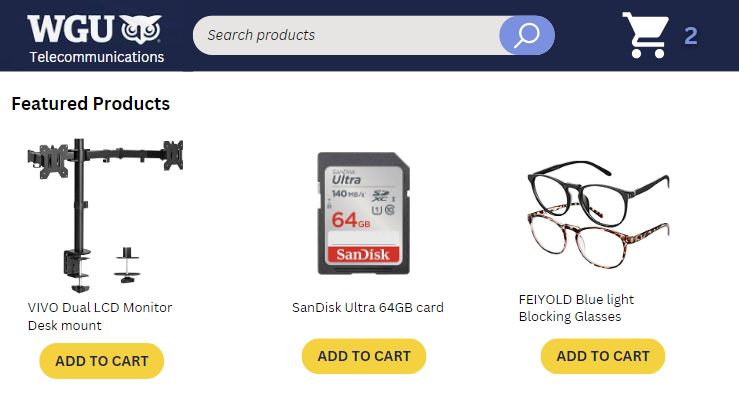
<br>*Product placement recommendation*

* Product suggestions: As desk mounts are frequently purchased in tandem with memory cards or blue light glasses, it is recommended that if a customer has a VIVO Dual LCD Monitor Desk mount in their cart, add a prompt for "You may also like..." and include the SanDisk Ultra 64GB card and FEIYOLD Blue light Blocking Glasses in suggested products.

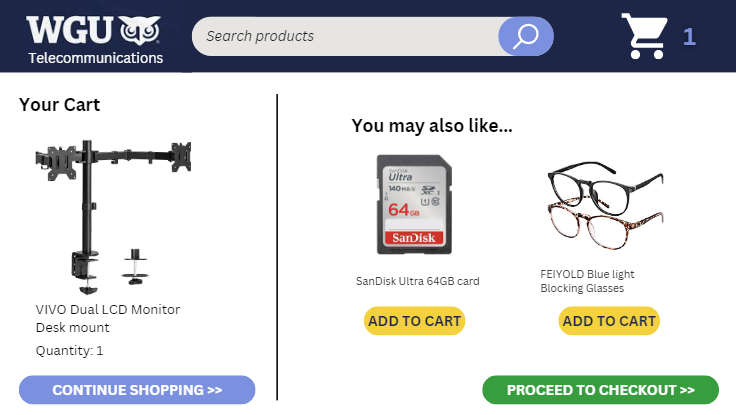
<br>*Suggested products recommendation*

* Discounts on popular items: Offer a discount on products frequently purchased together to improve both customer satisfaction and improve sales. For example-- offer a discount such as "Get 20% off a VIVO Dual LCD Monitor Desk mount when you purchase a SanDisk Ultra 64GB card, as these products are frequently purchased in the same transactions. 

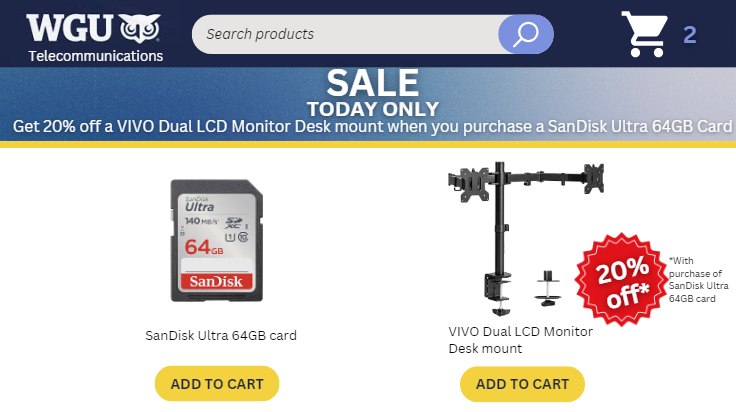
<br>*Product discount recommendation*

### Part V: Attachments

**E. Panopto video of code & programs**
<br>A Panopto presentation is provided separately with a demonstration and explanation of the code executed in this analysis. 

**F. Sources for third-party code**
<br> 
[Kesselly Kamara]. Data Mining II - D212 Task 3 [Video]. Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=db85c4f1-0da5-4bde-a1a4-b07c0019d46d

**G. Sources**

[Kesselly Kamara]. Data Mining II - D212 Theory [Video]. Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=9541a29b-2f14-4c5d-9d86-af030005bcf6

McColl, L. (n.d.). Market Basket Analysis: Understanding Customer Behaviour. Select Statistical Services. Retrieved February 5, 2024, from https://select-statistics.co.uk/blog/market-basket-analysis-understanding-customer-behaviour/#:~:text=Lift%3A%20the%20probability%20of%20all,was%20no%20association%20between%20them

Zhang, L. (n.d.). Understanding Support, Confidence, Lift for Market Basket (Affinity) Analysis. The Data School. Retrieved February 5, 2024, from https://www.thedataschool.co.uk/liu-zhang/understanding-lift-for-market-basket-analysis/